# **Time series prediction using RNN – Stock Market Analysis**

### Step 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

### Step 2: Load the dataset

In [9]:
dataframe = pd.read_csv('tesla.csv')  # Ensure the dataset has 'Date' and 'Close' columns
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe.set_index('Date', inplace=True)

### Step 3: Preprocess the data (Normalization)

In [10]:
closing_prices = dataframe[['Close']].values
scaler_obj = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler_obj.fit_transform(closing_prices)

### Step 4: Create sequences for the RNN

In [11]:
def generate_sequences(data, seq_len):
    X_seq, y_seq = [], []
    for idx in range(len(data) - seq_len):
        X_seq.append(data[idx:idx + seq_len])
        y_seq.append(data[idx + seq_len])
    return np.array(X_seq), np.array(y_seq)

sequence_len = 60  # You can modify the sequence length as needed
X_features, y_labels = generate_sequences(normalized_data, sequence_len)

### Step 5: Split the data into train and test sets

In [12]:
train_test_split_idx = int(len(X_features) * 0.8)
X_train_data, y_train_data = X_features[:train_test_split_idx], y_labels[:train_test_split_idx]
X_test_data, y_test_data = X_features[train_test_split_idx:], y_labels[train_test_split_idx:]

### Step 6: Build the RNN model

In [13]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_len, 1)))
rnn_model.add(Dense(1))  # Output layer for predicting the stock price

rnn_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 7: Train the model

In [14]:
training_history = rnn_model.fit(X_train_data, y_train_data, epochs=10, batch_size=32, validation_data=(X_test_data, y_test_data))

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0348 - val_loss: 0.0011
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.8332e-04 - val_loss: 8.5298e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.5120e-04 - val_loss: 9.3478e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.8857e-04 - val_loss: 9.5008e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.6332e-04 - val_loss: 9.7213e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.7371e-04 - val_loss: 7.6886e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.4573e-04 - val_loss: 9.6669e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.2881e-04 - val_loss: 7.7120e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.3070e-04 - val_loss: 9.4788e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.1017e-04 - val_loss: 6.5343e-04


### Step 8: Predict for the next 20 days

In [15]:
future_predictions = []
recent_sequence = normalized_data[train_test_split_idx - sequence_len:train_test_split_idx]

for _ in range(20):  # Predict for the next 20 days
    recent_sequence = np.reshape(recent_sequence, (1, sequence_len, 1))  # Ensure correct shape for RNN
    predicted_price = rnn_model.predict(recent_sequence)

    future_predictions.append(predicted_price[0][0])  # Store predicted price

    # Reshape predicted price and append it to the sequence
    predicted_price = np.reshape(predicted_price, (1, 1, 1))
    recent_sequence = np.append(recent_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


### Step 9: Inverse transform the predicted prices to the original scale

In [16]:
predicted_future_prices = scaler_obj.inverse_transform(np.array(future_predictions).reshape(-1, 1))

### Step 10: Compare with actual prices (next 20 days)

In [17]:
actual_future_prices = scaler_obj.inverse_transform(normalized_data[train_test_split_idx:train_test_split_idx+20])

### Step 11: Plot the results

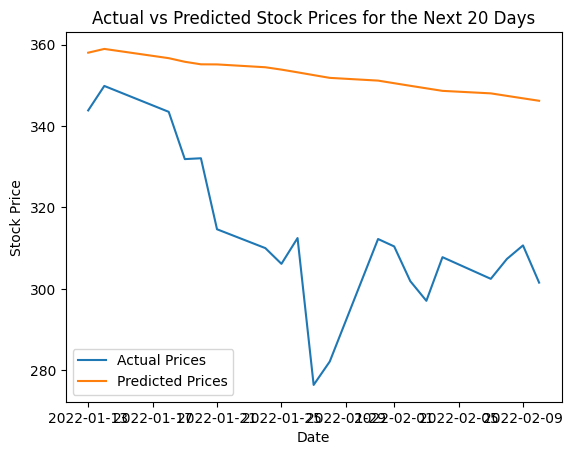

In [18]:
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], actual_future_prices, label='Actual Prices')
plt.plot(dataframe.index[train_test_split_idx:train_test_split_idx+20], predicted_future_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices for the Next 20 Days')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Step 12: Print actual and predicted prices for the next 20 days

In [19]:
for day in range(20):
    print(f"Day {day+1}: Actual: {actual_future_prices[day][0]}, Predicted: {predicted_future_prices[day][0]}")

Day 1: Actual: 343.85333251953125, Predicted: 358.0447082519531
Day 2: Actual: 349.8699951171875, Predicted: 358.9709167480469
Day 3: Actual: 343.5033264160156, Predicted: 356.69610595703125
Day 4: Actual: 331.8833312988281, Predicted: 355.80908203125
Day 5: Actual: 332.0899963378906, Predicted: 355.185791015625
Day 6: Actual: 314.6333312988281, Predicted: 355.16070556640625
Day 7: Actual: 310.0, Predicted: 354.46405029296875
Day 8: Actual: 306.1333312988281, Predicted: 353.8825378417969
Day 9: Actual: 312.4700012207031, Predicted: 353.2176513671875
Day 10: Actual: 276.3666687011719, Predicted: 352.5298767089844
Day 11: Actual: 282.1166687011719, Predicted: 351.85382080078125
Day 12: Actual: 312.239990234375, Predicted: 351.1811828613281
Day 13: Actual: 310.4166564941406, Predicted: 350.54034423828125
Day 14: Actual: 301.8866577148437, Predicted: 349.9041442871094
Day 15: Actual: 297.0466613769531, Predicted: 349.281005859375
Day 16: Actual: 307.7733459472656, Predicted: 348.6597290039